# Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D Sigmoid Plot

$S_{w, b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*x+b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

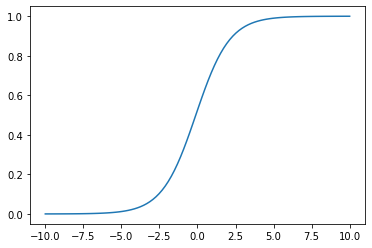

In [4]:
w = 0.9   #@param {type: "slider", min: -2, max:2}
b = 0.1
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## 2D Sigmoid Plot

$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))

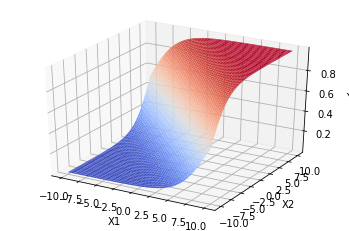

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)
w1 = 0.5
w2 = 0.5
b = 0.1
X1, X2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(X1, X2, w1, w2, b)

ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

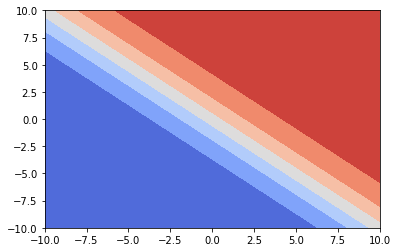

In [7]:
# Another method of visualizing it
plt.contourf(X1, X2, Y, cmap=cm.coolwarm)
plt.show()

# Compute Loss for a Given Dataset

In [8]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

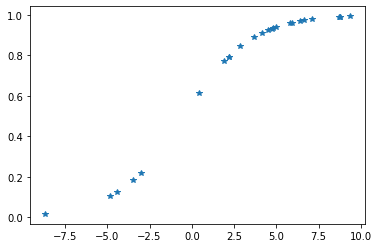

In [9]:
plt.plot(X, Y, '*')
plt.show()

In [10]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y-sigmoid(x, w_est, b_est))**2
    return loss

In [11]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB, = np.meshgrid(W, B)
loss = np.zeros(WW.shape)

In [12]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

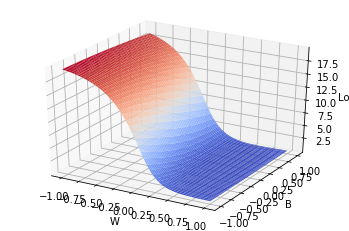

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(WW, BB, loss, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
plt.show()

In [14]:
ij = np.argmin(loss)
i = np.floor(ij/loss.shape[1])
j = ij - i * loss.shape[1]

In [15]:
i, j = int(i), int(j)

In [16]:
print(WW[i, j], BB[i, j])

0.49494949494949503 0.2525252525252526


# Sigmoid Neuron demonstration using Toy Data

In [17]:
from sigmoid_neuron import SigmoidNeuron

In [18]:
X = np.array([
    [2.5, 2.5],
    [4, -1],
    [1, -4],
    [-3, 1.25],
    [-2, -4],
    [1, 5]
])
Y = np.array([1, 1, 1, 0, 0, 0])

In [19]:
sn = SigmoidNeuron()
sn.fit(X, Y, epochs=100, learning_rate=0.1)
print(f"Weights: {sn.w[0]} | Bias: {sn.b[0]}")

100%|██████████| 100/100 [00:00<00:00, 5436.91it/s]Weights: [ 1.73850442 -0.57440763] | Bias: -0.5715643027044511



In [20]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.array([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    
    ax.contourf(XX1, XX2, YY, cmap=cm.coolwarm, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm.coolwarm)
    ax.plot()

100%|██████████| 1/1 [00:00<00:00, 3066.01it/s]


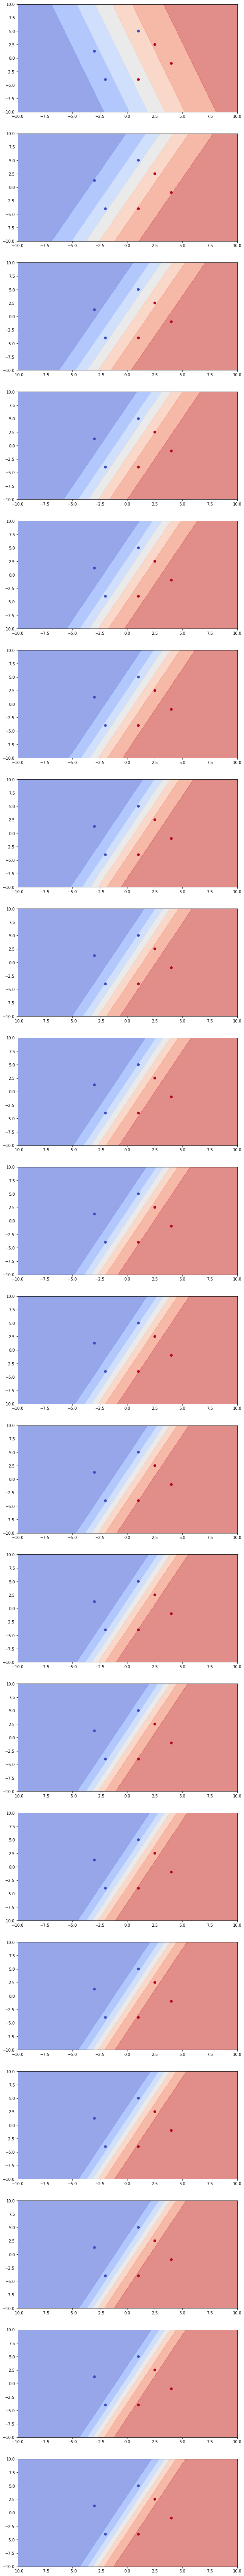

In [21]:
sn.fit(X, Y, 1, 0.25, True)
N = 20
plt.figure(figsize=(10, N*6))
for i in range(N):
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.25, False)

# Apply Sigmoid on real world dataset

## Read, visualize and Preprocess dataset

In [22]:
import pandas as pd

data = pd.read_csv('data/mobile_cleaned.csv')
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [23]:
data.shape

(341, 88)

In [24]:
X = data.drop('Rating', axis=1)
Y = np.array(data['Rating'])

In [25]:
threshold = 4.1
data['Class'] = (data['Rating'] >= threshold).astype(np.uint8)
data['Class'].value_counts(normalize=True)

1    0.58651
0    0.41349
Name: Class, dtype: float64

In [26]:
Y_binarized = data['Class'].values
np.unique(Y_binarized, return_counts=True)

(array([0, 1], dtype=uint8), array([141, 200]))

## Standardization & Train-Test Split

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarized)

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((255, 87), (255,), (86, 87), (86,))

In [29]:
std_scaler = StandardScaler()

X_scaled_train = std_scaler.fit_transform(X_train)
X_scaled_test = std_scaler.transform(X_test)

In [30]:
min_max_scaler = MinMaxScaler()

Y_scaled_train = min_max_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_scaled_test = min_max_scaler.transform(Y_test.reshape(-1, 1))

In [31]:
scaled_threshold = min_max_scaler.transform([[threshold]])[0]
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype(np.uint8).ravel()
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype(np.uint8).ravel()

## Training and Predicting

In [32]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=5000, learning_rate=0.015, display_loss=True)

100%|██████████| 1500/1500 [00:17<00:00, 87.07it/s]


TypeError: float() argument must be a string or a number, not 'dict_values'

In [0]:
Y_pred_train = sn.predit(X_scaled_train)
Y_pred_test = sn.predit(X_scaled_test)

In [0]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype(np.uint8).ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype(np.uint8).ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarized_train, Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test, Y_binarized_test)

In [0]:
print(accuracy_train, accuracy_test)